<a href="https://colab.research.google.com/github/theyashmishra/Dog-Breed-Classifier/blob/main/Dog_Breed_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Dog Breed Classification:**
As an assignment I have made this Model using Transfer learning(ResNet50) and CNN,I have rained this Model on kaggle platform as it provides much powerful GPU and also the data can be fetch easily from kaggle itself.

In [ ]:
import os
import warnings
import random
from shutil import copyfile
import numpy as np
import pandas as pd
import itertools
#data visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
import pathlib
#deep learning libraries
import tensorflow as tf
from keras.optimizers import Adam
from keras.layers import Conv2D, Flatten, Dense, MaxPooling2D, Dropout
from keras.models import Sequential
from mpl_toolkits.axes_grid1 import ImageGrid
from keras.preprocessing.image import ImageDataGenerator
#importing ResNet50 model
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions

Dataset link: https://www.kaggle.com/c/dog-breed-identification/data

In [ ]:
#train and test directories
dir_train='../input/dog-breed-identification/train'
dir_test='../input/dog-breed-identification/test'

#labels have image name and dog breed in a csv file and sample_submission contain details of test set
df_train= pd.read_csv('../input/dog-breed-identification/labels.csv',dtype=str)
df_test= pd.read_csv('../input/dog-breed-identification/sample_submission.csv',dtype=str)

In [ ]:
#images are in jpg format and to match their names in csv file we appending 'jpg' in it
def append_ext(fn):
    return fn+".jpg"

In [ ]:
df_train["id"] = df_train["id"].apply(append_ext)
df_test["id"] = df_test["id"].apply(append_ext)

***Training Data:*** Only the specified breeds of dogs are included,Rest of them are dropped.

In [ ]:
#As instructed all other breeds except suggested ones are deleted
inc_breed=['beagle','chihuahua','doberman','french_bulldog','golden_retriever','malamute','pug','saint_bernard', 'scottish_deerhound',
'tibetan_mastiff']
for i,breed in df_train.iterrows():
    if breed[1] not in inc_breed:
        df_train=df_train.drop([i])
       
len(df_train)

841

***Training set and Test set***

In [ ]:
print(df_train.head())
df_test.head()

                                      id               breed
4   0021f9ceb3235effd7fcde7f7538ed62.jpg    golden_retriever
9   0042188c895a2f14ef64a918ed9c7b64.jpg  scottish_deerhound
20  008b1271ed1addaccf93783b39deab45.jpg            doberman
25  00a366d4b4a9bbb6c8a63126697b7656.jpg    golden_retriever
37  0100f55e4f0fe28f2c0465d3fc4b9897.jpg    golden_retriever


,id,affenpinscher,afghan_hound,african_hunting_dog,airedale,american_staffordshire_terrier,appenzeller,australian_terrier,basenji,basset,...,toy_poodle,toy_terrier,vizsla,walker_hound,weimaraner,welsh_springer_spaniel,west_highland_white_terrier,whippet,wire-haired_fox_terrier,yorkshire_terrier
0,000621fb3cbb32d8935728e48679680e.jpg,0.00833333333333333,0.00833333333333333,0.00833333333333333,0.00833333333333333,0.00833333333333333,0.00833333333333333,0.00833333333333333,0.00833333333333333,0.00833333333333333,...,0.00833333333333333,0.00833333333333333,0.00833333333333333,0.00833333333333333,0.00833333333333333,0.00833333333333333,0.00833333333333333,0.00833333333333333,0.00833333333333333,0.00833333333333333
1,00102ee9d8eb90812350685311fe5890.jpg,0.00833333333333333,0.00833333333333333,0.00833333333333333,0.00833333333333333,0.00833333333333333,0.00833333333333333,0.00833333333333333,0.00833333333333333,0.00833333333333333,...,0.00833333333333333,0.00833333333333333,0.00833333333333333,0.00833333333333333,0.00833333333333333,0.00833333333333333,0.00833333333333333,0.00833333333333333,0.00833333333333333,0.00833333333333333
2,0012a730dfa437f5f3613fb75efcd4ce.jpg,0.00833333333333333,0.00833333333333333,0.00833333333333333,0.00833333333333333,0.00833333333333333,0.00833333333333333,0.00833333333333333,0.00833333333333333,0.00833333333333333,...,0.00833333333333333,0.00833333333333333,0.00833333333333333,0.00833333333333333,0.00833333333333333,0.00833333333333333,0.00833333333333333,0.00833333333333333,0.00833333333333333,0.00833333333333333
3,001510bc8570bbeee98c8d80c8a95ec1.jpg,0.00833333333333333,0.00833333333333333,0.00833333333333333,0.00833333333333333,0.00833333333333333,0.00833333333333333,0.00833333333333333,0.00833333333333333,0.00833333333333333,...,0.00833333333333333,0.00833333333333333,0.00833333333333333,0.00833333333333333,0.00833333333333333,0.00833333333333333,0.00833333333333333,0.00833333333333333,0.00833333333333333,0.00833333333333333
4,001a5f3114548acdefa3d4da05474c2e.jpg,0.00833333333333333,0.00833333333333333,0.00833333333333333,0.00833333333333333,0.00833333333333333,0.00833333333333333,0.00833333333333333,0.00833333333333333,0.00833333333333333,...,0.00833333333333333,0.00833333333333333,0.00833333333333333,0.00833333333333333,0.00833333333333333,0.00833333333333333,0.00833333333333333,0.00833333333333333,0.00833333333333333,0.00833333333333333


***Training Images***

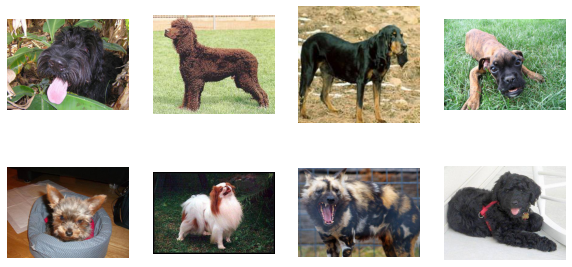

In [ ]:
#display some images with help of matplotlib
source_path = "../input/dog-breed-identification/train"
sub_class = os.listdir(source_path)

fig = plt.figure(figsize=(10,5))
for i in range(len(sub_class[:8])):
    plt.subplot(2,4,i+1)
    imag = plt.imread(os.path.join(source_path,sub_class[i+7]))
    plt.imshow(imag, cmap=plt.get_cmap('gray'))
    plt.axis('off')

***Data Preprocessing:*** Here Image are rescaled ,rotated, shifted and its characterstics are altered than put it in training set for better understanding of our model.

In [ ]:
#Generating batches of tensor image data with real-time data augmentation.
train_datagen=ImageDataGenerator( rescale=1./255.,
                                  rotation_range = 20,
                                  brightness_range=[0.2,1.0],
                                  width_shift_range = 0.2,
                                  height_shift_range = 0.2,
                        
                                  horizontal_flip = True,
                                
                                  validation_split=0.1
                                  )

In [ ]:
#Generating batches of tensor image data with real-time data augmentation for training set.
train_generator=train_datagen.flow_from_dataframe(
directory=dir_train,
dataframe=df_train,
x_col="id",
y_col="breed",
subset="training",
batch_size=32,
seed=42,
shuffle=True,
class_mode="categorical",
target_size=(224,224)

)

Found 757 validated image filenames belonging to 10 classes.


***Validation Data***

In [ ]:
#Generating batches of tensor image data with real-time data augmentation for validation set set.
validation_generator=train_datagen.flow_from_dataframe(
directory=dir_train,
dataframe=df_train,
x_col="id",
y_col="breed",
subset="validation",
batch_size=32,
seed=42,
shuffle=True,
class_mode="categorical",
target_size=(224,224)
)

Found 84 validated image filenames belonging to 10 classes.


***Test Data***

In [ ]:
test_datagen=ImageDataGenerator(rescale=1./255.)
#Generating batches of tensor image data with real-time data augmentation for Test set.

test_generator=test_datagen.flow_from_dataframe(
directory=dir_test,
dataframe=df_test,
x_col="id",
y_col=None,
batch_size=32,
seed=42,
shuffle=False,
class_mode=None,
target_size=(224,224),
)

Found 10357 validated image filenames.


In [ ]:
classes=len(inc_breed)
classes

10

***Using Pretrained Model : ResNet50***

In [ ]:
#Freezing Resnet50 model to avoid weight updation
pretrained_model =ResNet50(
        weights='imagenet',
        include_top=False ,
        input_shape=(224,224,3)
    )

94773248/94765736 [==============================] - 1s 0us/step


In [ ]:
#defing model
model =Sequential([ 
        pretrained_model,  
        Flatten(),
#         tf.keras.layers.GlobalAveragePooling2D(),
        Dense(2048, activation='relu'),
        Dropout(0.5),

        Dense(256, activation='relu'),
        Dropout(0.5),
        Dense(64, activation='relu'),
        Dropout(0.3),
    
        Dense(10, activation='softmax')
    ])

**Recall, Precision, f1 Score**

In [ ]:
#as mentioned f1score, recall, precision are defined as our judging criteria for model
from keras import backend as bd

def recall_m(y_true, y_pred):
    true_positives =bd.sum(bd.round(bd.clip(y_true*y_pred,0,1)))
    possible_positives =bd.sum(bd.round(bd.clip(y_true,0,1)))
    recall =true_positives/(possible_positives+bd.epsilon())
    return recall

def precision_m(y_true, y_pred):
    true_positives =bd.sum(bd.round(bd.clip(y_true*y_pred,0,1)))
    predicted_positives =bd.sum(bd.round(bd.clip(y_pred,0,1)))
    precision = true_positives / (predicted_positives+bd.epsilon())
    return precision

def f1_m(y_true, y_pred): 
    precision =precision_m(y_true,y_pred)
    recall =recall_m(y_true,y_pred)
    return (2*((precision*recall)/(precision+recall+bd.epsilon())))

***Model Optimization using Stochastic Gradient descent***

In [ ]:
#stochastic gradient descent is used as optimizer and categorical_crossentropy is used for multiclass classification.
opt=Adam(lr=1e-4)
model.compile(optimizer=opt,loss='categorical_crossentropy',metrics=['acc',f1_m,precision_m, recall_m])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50 (Functional)        (None, 7, 7, 2048)        23587712  
_________________________________________________________________
flatten (Flatten)            (None, 100352)            0         
_________________________________________________________________
dense (Dense)                (None, 2048)              205522944 
_________________________________________________________________
dropout (Dropout)            (None, 2048)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               524544    
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 64)                1

***Model Fitting:***Fitting on train_generator, Validated on validation generator,with 50 epochs.

In [ ]:
#model fitting with 50 epochs
step_size_ =train_generator.n//train_generator.batch_size
valid_step_size_ =validation_generator.n//validation_generator.batch_size
history =model.fit(train_generator,
                    steps_per_epoch=step_size_,
                    validation_data=validation_generator,
                    validation_steps=valid_step_size_ ,
                    epochs=50,
#                     
                   )

Epoch 1/50
23/23 [==============================] - 29s 856ms/step - loss: 6.3759 - acc: 0.1310 - f1_m: 0.1253 - precision_m: 0.1362 - recall_m: 0.1162 - val_loss: 2.3004 - val_acc: 0.1250 - val_f1_m: 0.0000e+00 - val_precision_m: 0.0000e+00 - val_recall_m: 0.0000e+00
Epoch 2/50
23/23 [==============================] - 14s 597ms/step - loss: 4.4754 - acc: 0.2057 - f1_m: 0.1920 - precision_m: 0.2199 - recall_m: 0.1720 - val_loss: 2.4075 - val_acc: 0.1094 - val_f1_m: 0.0000e+00 - val_precision_m: 0.0000e+00 - val_recall_m: 0.0000e+00
Epoch 3/50
23/23 [==============================] - 13s 565ms/step - loss: 3.1342 - acc: 0.2662 - f1_m: 0.2599 - precision_m: 0.3434 - recall_m: 0.2117 - val_loss: 4.3068 - val_acc: 0.1719 - val_f1_m: 0.1526 - val_precision_m: 0.1970 - val_recall_m: 0.1250
Epoch 4/50
23/23 [==============================] - 14s 594ms/step - loss: 2.3758 - acc: 0.2994 - f1_m: 0.2783 - precision_m: 0.4198 - recall_m: 0.2101 - val_loss: 4.4179 - val_acc: 0.0312 - val_f1_m: 0.03

***Plotting Curves***

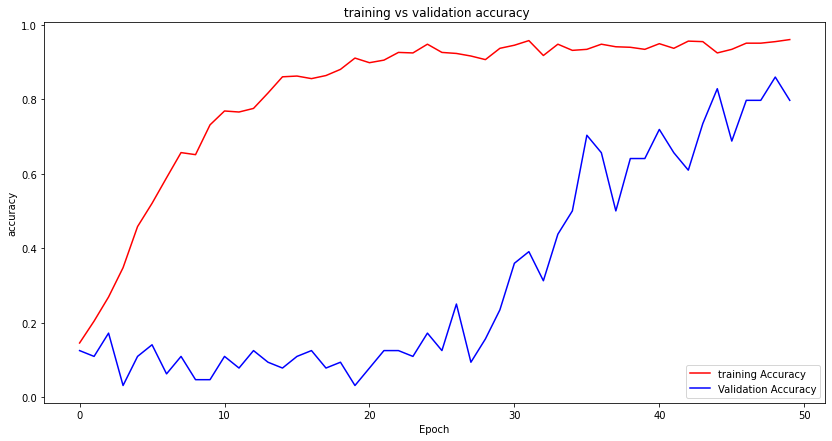

In [ ]:
#plot of epoch vs accuracy for trainig set and epoch vs validation_accuracy for validation set
acc=history.history['acc']
val_acc=history.history['val_acc']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(len(acc))

fig=plt.figure(figsize=(14,7))
plt.plot(epochs,acc,'r', label='training Accuracy')
plt.plot(epochs,val_acc,'b', label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('accuracy')
plt.title(' training vs validation accuracy')
plt.legend(loc='lower right')
plt.show()


***As we see Model is all good***

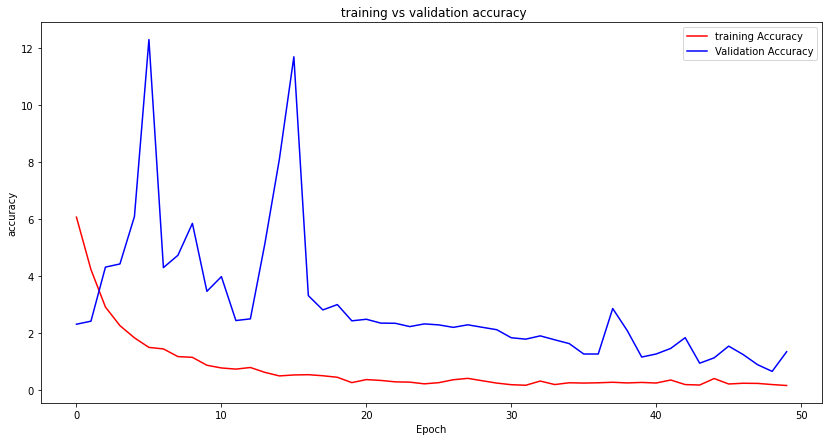

In [ ]:
#plot of epoch vs loss for trainig set and epoch vs validation_loss for validation set

fig2=plt.figure(figsize=(14,7))
plt.plot(epochs,loss,'r', label='training Accuracy')
plt.plot(epochs,val_loss,'b', label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('accuracy')
plt.title(' training vs validation accuracy')
plt.legend(loc='upper right')
plt.show()


***training set vs validation set on loss function***

***Judgement criterias of our model :***Loss, Accuracy, f1_score

In [ ]:
#judging criterias of our model
loss, accuracy, f1_score, precision, recall = model.evaluate(validation_generator,batch_size=32)

print("Loss:", loss)
print("Accuracy:", accuracy)
print("F1 Score:", f1_score)

3/3 [==============================] - 1s 436ms/step - loss: 1.2789 - acc: 0.8095 - f1_m: 0.8355 - precision_m: 0.8632 - recall_m: 0.8104
Loss: 1.278898000717163
Accuracy: 0.8095238208770752
F1 Score: 0.8355190753936768


***Saving the Model for in future use***

In [ ]:
#saving model for further use 
model.save("DogClassificationByResNet2.h5")

***model prediction on test data(sample_submission.csv)***

In [ ]:
#prediction on test set using test generator
pred=model.predict(test_generator)

In [ ]:
#sample test file
df_submission = pd.read_csv('/kaggle/input/dog-breed-identification/sample_submission.csv', usecols= inc_breed+['id'])
df_submission.head()

,id,beagle,chihuahua,doberman,french_bulldog,golden_retriever,malamute,pug,saint_bernard,scottish_deerhound,tibetan_mastiff
0,000621fb3cbb32d8935728e48679680e,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333
1,00102ee9d8eb90812350685311fe5890,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333
2,0012a730dfa437f5f3613fb75efcd4ce,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333
3,001510bc8570bbeee98c8d80c8a95ec1,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333
4,001a5f3114548acdefa3d4da05474c2e,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333


***updating the values of probability***

In [ ]:
#prediction on sample test file    
df_submission.iloc[:,1:] = pred
df_submission.head()

,id,beagle,chihuahua,doberman,french_bulldog,golden_retriever,malamute,pug,saint_bernard,scottish_deerhound,tibetan_mastiff
0,000621fb3cbb32d8935728e48679680e,9.999806e-01,4.294337e-07,7.502942e-10,2.991734e-08,1.353960e-07,3.403289e-08,3.781583e-07,1.671122e-05,1.650714e-06,4.998900e-08
1,00102ee9d8eb90812350685311fe5890,1.004044e-09,2.064505e-07,3.773083e-12,3.336029e-04,1.331436e-06,9.996631e-01,1.071439e-06,3.887099e-07,1.463475e-08,3.063878e-07
2,0012a730dfa437f5f3613fb75efcd4ce,7.787602e-04,8.851278e-04,3.575551e-04,3.622575e-03,9.906182e-01,3.990095e-04,4.594751e-04,1.348057e-03,4.193775e-04,1.111851e-03
3,001510bc8570bbeee98c8d80c8a95ec1,1.563949e-03,1.931408e-02,3.390513e-04,7.085820e-04,3.636858e-04,2.717555e-04,9.747781e-01,4.193272e-04,1.484978e-03,7.564630e-04
4,001a5f3114548acdefa3d4da05474c2e,1.877552e-04,8.611174e-05,2.068050e-05,1.854601e-05,3.629385e-04,3.543561e-04,2.700779e-01,2.929606e-04,7.221385e-01,6.460337e-03


***final size of our result(csv file)***

In [ ]:
#size of data
df_submission.shape

(10357, 11)